# Fit2Wear

You’re on the data science team at Rent the Runway. Your customers pay a monthly fee in which they receive four items of clothing per month. A recent customer satisfaction survey found that the greatest reason of customer churn was ordering an item that did not fit well. Vanity sizing plagues the clothing industry and so two items with the same dress size can have wildly different fits.  

1. Which items have the truest fit? What does that mean?
2. Are some categories of clothing more significantly more prone to have ill-fitting clothes? 
3. Build a model that empowers a user to discover whether a given item at a given size is likely to fit loosely, well, or tightly. 
4. How would you design a model that also takes in a user’s previous history into making your decision? If time permits, build this. 
5. While this data is anonymized, Rent the Runway, like all companies in retail, handles sensitive and highly personal information about their customers. What is the tradeoff between the confidence of your inference and the information you collect in the context of this business problem.

## Load data & EDA

In [119]:
import json
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [120]:
with open('renttherunway_final_data.json') as f:
    data = [json.loads(line) for line in f]

In [121]:
df = pd.DataFrame.from_dict(data,orient='columns')

In [122]:
df.head(3)

,age,body type,bust size,category,fit,height,item_id,rating,rented for,review_date,review_summary,review_text,size,user_id,weight
0,28,hourglass,34d,romper,fit,"5' 8""",2260466,10,vacation,"April 20, 2016",So many compliments!,An adorable romper! Belt and zipper were a lit...,14,420272,137lbs
1,36,straight & narrow,34b,gown,fit,"5' 6""",153475,10,other,"June 18, 2013",I felt so glamourous!!!,I rented this dress for a photo shoot. The the...,12,273551,132lbs
2,116,NaN,NaN,sheath,fit,"5' 4""",1063761,10,party,"December 14, 2015",It was a great time to celebrate the (almost) ...,This hugged in all the right places! It was a ...,4,360448,NaN


Which items have the truest fit? What does that mean?

In [123]:
df_item = df['item_id'].value_counts().reset_index()
df_item.columns = ['item_id','count']

df_fitted = df[df['fit']=='fit']
df_fitted = df_fitted['item_id'].value_counts().reset_index()
df_fitted.columns = ['item_id','count']

df_fitted_rate = pd.merge(df_item,df_fitted,on = 'item_id')
df_fitted_rate.columns = ['item_id','Total_number','Fitted_item']

df_fitted_rate['Fit_rate'] = df_fitted_rate['Fitted_item']/df_fitted_rate['Total_number']
df_fitted_rate = df_fitted_rate.sort_values(by = 'Fit_rate',ascending = False)

In [124]:
df_fitted_rate.head(10)

,item_id,Total_number,Fitted_item,Fit_rate
5634,705502,1,1,1.0
4864,2462555,3,3,1.0
4889,2644369,3,3,1.0
4888,1382903,3,3,1.0
4885,1026404,3,3,1.0
4884,355881,3,3,1.0
4882,2385167,3,3,1.0
4881,494266,3,3,1.0
4875,2005193,3,3,1.0
4874,1237908,3,3,1.0


In [125]:
# select those items with more than 50 
df_fitted_rate_over50 = df_fitted_rate[df_fitted_rate['Total_number']>=50]
df_fitted_rate_over50 = df_fitted_rate_over50.reset_index().sort_values(['Fit_rate'],ascending = False)

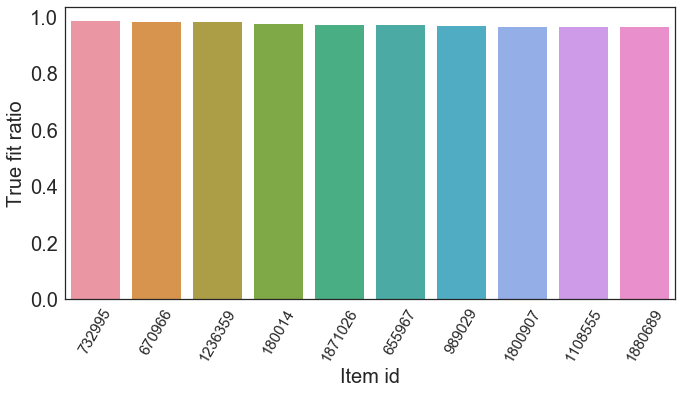

In [126]:
#plot
fig,axs = plt.subplots(nrows = 1, figsize = (10,6))
sns.set(font_scale = 2)
sns.set_style('white')
p1 = sns.barplot(x = 'item_id', y = 'Fit_rate',
                 data = df_fitted_rate_over50[:10], order = df_fitted_rate_over50['item_id'][:10])
p1.set_xticklabels(p1.get_xticklabels(),rotation=60,fontsize=15)
p1.set_xlabel('Item id',fontsize=20)
p1.set_ylabel('True fit ratio',fontsize = 20)
plt.tight_layout()
plt.savefig("True_ratio_item_id.png")
plt.show()

Are some categories of clothing more significantly more prone to have ill-fitting clothes? 

In [46]:
df['category'].unique()

array(['romper', 'gown', 'sheath', 'dress', 'leggings', 'top', 'jumpsuit',
       'sweater', 'jacket', 'shirtdress', 'maxi', 'shift', 'pants',
       'shirt', 'mini', 'skirt', 'pullover', 'blouse', 'suit', 'coat',
       'trench', 'bomber', 'cape', 'blazer', 'vest', 'duster', 'ballgown',
       'tank', 'poncho', 'frock', 'tunic', 'cardigan', 'culottes', 'down',
       'trouser', 'midi', 'pant', 'legging', 'print', 'knit', 'culotte',
       'sweatshirt', 'peacoat', 'kaftan', 'overalls', 'jogger', 'tee',
       'combo', 'henley', 'cami', 'blouson', 'turtleneck', 'trousers',
       'overcoat', 'hoodie', 't-shirt', 'caftan', 'tight', 'kimono',
       'for', 'crewneck', 'skirts', 'parka', 'buttondown', 'skort',
       'sweatershirt', 'sweatpants', 'jeans'], dtype=object)

In [127]:
df_cat = df['category'].value_counts().reset_index()
df_cat.columns = ['category','count']

df_fitted = df[df['fit']=='fit']
df_fitted = df_fitted['category'].value_counts().reset_index()
df_fitted.columns = ['category','count']

df_cat_rate = pd.merge(df_cat,df_fitted,on = 'category')
df_cat_rate.columns = ['category','Total_number','Fitted_item']

df_cat_rate['Fit_rate'] = df_cat_rate['Fitted_item']/df_cat_rate['Total_number']
df_cat_rate = df_cat_rate.sort_values(by = 'Fit_rate',ascending = True)

In [128]:
df_cat_rate.head(10)

,category,Total_number,Fitted_item,Fit_rate
58,skort,7,1,0.142857
45,kaftan,17,4,0.235294
51,hoodie,14,5,0.357143
49,tight,15,7,0.466667
62,caftan,4,2,0.500000
41,kimono,30,16,0.533333
18,vest,278,163,0.586331
12,coat,980,584,0.595918
34,pullover,58,35,0.603448
17,pants,422,263,0.623223


In [129]:
df_cat_rate_over50 = df_cat_rate[df_cat_rate['Total_number']>=50]

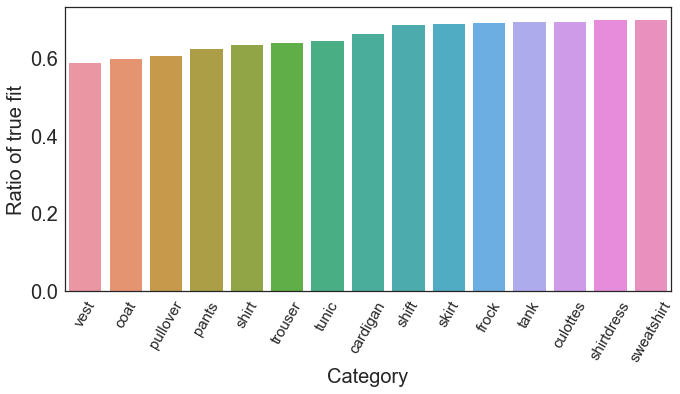

In [130]:
fig,axs = plt.subplots(nrows = 1, figsize = (10,6))
sns.set(font_scale = 2)
sns.set_style('white')
p1 = sns.barplot(x = df_cat_rate_over50['category'].head(15), y = df_cat_rate_over50['Fit_rate'],data = df_cat_rate_over50.head(15))
p1.set_xticklabels(p1.get_xticklabels(),rotation=60,fontsize=15)
p1.set_xlabel('Category',fontsize=20)
p1.set_ylabel('Ratio of true fit',fontsize = 20)

plt.tight_layout()
plt.savefig("True_ratio_category.png")
plt.show()

## Model 1 with item informations and user's information

### Preprocessing data

In [131]:
df['fit'].value_counts()

fit      142058
small     25779
large     24707
Name: fit, dtype: int64

In [133]:
df_ratio = df['fit'].value_counts().reset_index()
df_ratio.columns = ['fit','count']

In [134]:
df_ratio

,fit,count
0,fit,142058
1,small,25779
2,large,24707


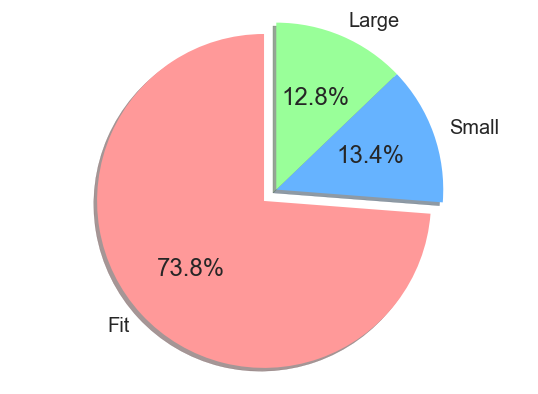

In [135]:
# Pie chart
labels = ['Fit', 'Small', 'Large']
sizes = df_ratio['count']
# only "explode" the 2nd slice (i.e. 'Hogs')
explode = [0.1,0,0]
colors = ['#ff9999','#66b3ff','#99ff99']

fig1, ax1 = plt.subplots()
ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=True, colors = colors,startangle=90)
# Equal aspect ratio ensures that pie is drawn as a circle
ax1.axis('equal')  
plt.tight_layout()
plt.savefig("True_fit_ratio.png")
plt.show()

In [13]:
df.isna().sum()

age                 960
body type         14637
bust size         18411
category              0
fit                   0
height              677
item_id               0
rating               82
rented for           10
review_date           0
review_summary        0
review_text           0
size                  0
user_id               0
weight            29982
dtype: int64

In [153]:
to_keep = ['age','body type','bust size','category','fit','height','item_id','rating','size','weight']
clean_df = df[to_keep].dropna()

In [154]:
clean_df.head(2)

,age,body type,bust size,category,fit,height,item_id,rating,size,weight
0,28,hourglass,34d,romper,fit,"5' 8""",2260466,10,14,137lbs
1,36,straight & narrow,34b,gown,fit,"5' 6""",153475,10,12,132lbs


In [155]:
# change height units to inches
def convert_height(H):  
    H_feet = H.split("'")[0]
    H_inch = H.split("'")[1].split("\"")[0]
    H_inches = int(H_feet) * 12 + int(H_inch)
    return H_inches

In [156]:
def preprocess(clean_df):
    #average ratings for items
    clean_df['rating'] = clean_df['rating'].astype(int)
    rating_data = clean_df.groupby('item_id',as_index = False).aggregate({
        'rating':'mean'
    })
    clean_df = pd.merge(clean_df,rating_data,on='item_id')
    
    # remove units for weight
    clean_df['weight'] = clean_df['weight'].map(lambda x: str(x)[:-3]).astype(int)
    
    # convert age from string to int
    clean_df['age'] = clean_df['age'].astype(int)
    
    # change height units to inches
    clean_df['height'] = clean_df['height'].apply(lambda x:convert_height(x))
    
    # remove the original ratings
    clean_df = clean_df.drop(['rating_x'],axis = 1)
    
    return clean_df

In [157]:
model_df = preprocess(clean_df)

In [15]:
#merge bust size
#bust_size_dic = {}
#for i in range(len(bust_size)):
#    if bust_size['count'][i] < 500:
#        bust_size_dic[bust_size['bust size'][i]] = 'Other'
#    else:
#        bust_size_dic[bust_size['bust size'][i]] = bust_size['bust size'][i]
#clean_df['new_bust_size'] = clean_df['bust size'].map(bust_size_dic)

In [161]:
#split the dataset
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split

le = LabelEncoder()
categorical_feats = ['fit','body type','item_id','bust size','category']
model_df[categorical_feats] = model_df[categorical_feats].apply(lambda col: le.fit_transform(col))

seed =  42
X = model_df.drop(['fit'],axis = 1)
y = model_df['fit']
X_train,X_test,y_train,y_test = train_test_split(X,y,random_state=seed)

In [164]:
# SMOTE
from imblearn.over_sampling import SMOTE

sm = SMOTE(random_state = 2)
X_train, y_train = sm.fit_sample(X_train, y_train.ravel())

In [165]:
print('After OverSampling, the shape of train_X: {}'.format(X_train.shape))
print('After OverSampling, the shape of train_y: {} \n'.format(y_train.shape))

print("After OverSampling, counts of label '0': {}".format(sum(y_train==0)))
print("After OverSampling, counts of label '1': {}".format(sum(y_train==1)))
print("After OverSampling, counts of label '2': {}".format(sum(y_train==2)))

After OverSampling, the shape of train_X: (242322, 9)
After OverSampling, the shape of train_y: (242322,) 

After OverSampling, counts of label '0': 80774
After OverSampling, counts of label '1': 80774
After OverSampling, counts of label '2': 80774


In [168]:
import lightgbm as lgb

clf = lgb.LGBMClassifier(boosting_type= 'goss',
                         objective = 'multiclass',
                         n_jobs = 3, # Updated from 'nthread'
                         silent = True,
                         num_leaves = 300,
                         num_class = 3,
                         min_child_samples = 150,
                         min_child_weight = 0.1,
                         subsample = 0.5,
                         reg_alpha = 2,
                         reg_lambda = 1)

clf.fit(X_train, y_train)

LGBMClassifier(boosting_type='goss', class_weight=None, colsample_bytree=1.0,
               importance_type='split', learning_rate=0.1, max_depth=-1,
               min_child_samples=150, min_child_weight=0.1, min_split_gain=0.0,
               n_estimators=100, n_jobs=3, num_class=3, num_leaves=300,
               objective='multiclass', random_state=None, reg_alpha=2,
               reg_lambda=1, silent=True, subsample=0.5,
               subsample_for_bin=200000, subsample_freq=0)

In [169]:
import itertools

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=0)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        #print("Normalized confusion matrix")
    else:
        1#print('Confusion matrix, without normalization')

    #print(cm)

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

In [117]:
y_pred = clf.predict(X_train)

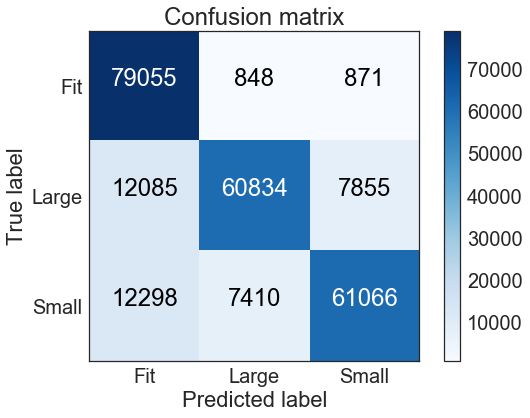

In [170]:
from sklearn.metrics import confusion_matrix, precision_recall_curve, auc, roc_auc_score, roc_curve, recall_score, classification_report
cnf_matrix_tra = confusion_matrix(y_train, y_pred)

#print("Recall metric in the train dataset: {}%".format(100*cnf_matrix_tra[1,1]/(cnf_matrix_tra[1,0]+cnf_matrix_tra[1,1])))

#y_pred_sample_score = clf.predict(X_test)

class_names = ['Fit','Large','Small']
plt.figure()
plot_confusion_matrix(cnf_matrix_tra , classes=class_names, title='Confusion matrix')
plt.savefig('confusion_matrix.png',bbox_inches = "tight")
plt.show()

In [171]:
target_names = ['fit','large','small']
print(classification_report(y_train, y_train_pre, target_names=target_names))

              precision    recall  f1-score   support

         fit       0.75      0.98      0.85     80774
       large       0.83      0.69      0.75     80774
       small       0.82      0.70      0.75     80774

    accuracy                           0.79    242322
   macro avg       0.80      0.79      0.79    242322
weighted avg       0.80      0.79      0.79    242322



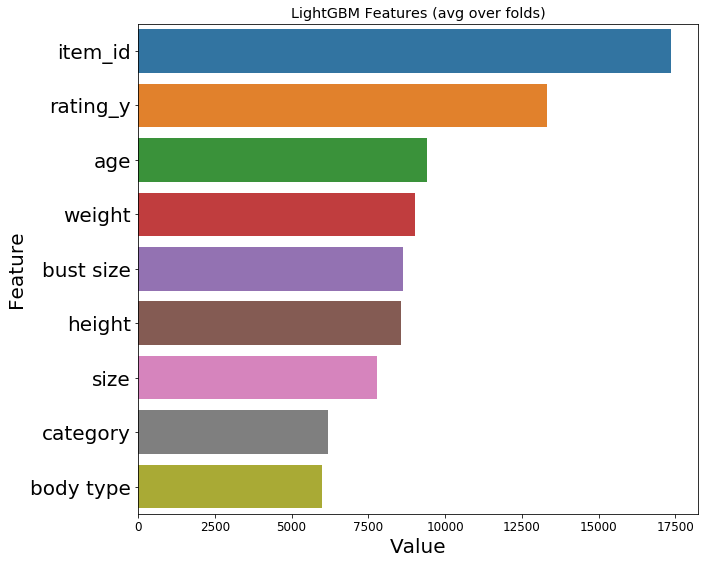

In [83]:
from lightgbm import plot_importance

feature_imp = pd.DataFrame(sorted(zip(clf.feature_importances_,X.columns)), 
                               columns=['Value','Feature'])
plt.figure(figsize=(10, 8))
p2 = sns.barplot(x= "Value", y="Feature", data=feature_imp.sort_values(by="Value", ascending=False))

p2.set_xlabel('Value',fontsize=20)
p2.set_ylabel('Feature',fontsize = 20)
p2.set_yticklabels(p2.get_yticklabels(),fontsize=20)

plt.title('LightGBM Features (avg over folds)')
plt.tight_layout()
plt.savefig('lgbm_importances.png')
plt.show()

## Model 2 without user's information

In [174]:
# preprocess the dataset
model_df = preprocess(clean_df)

#split the dataset
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split

le = LabelEncoder()
categorical_feats = ['fit','body type','item_id','bust size','category']
model_df[categorical_feats] = model_df[categorical_feats].apply(lambda col: le.fit_transform(col))

seed =  42
X = model_df.drop(['fit','age','body type','bust size','height','weight'],axis = 1)
y = model_df['fit']
X_train,X_test,y_train,y_test = train_test_split(X,y,random_state=seed)

In [175]:
#SMOTE
from imblearn.over_sampling import SMOTE

sm = SMOTE(random_state = 2)
X_train, y_train = sm.fit_sample(X_train, y_train.ravel())

In [176]:
#model 
clf.fit(X_train, y_train)

LGBMClassifier(boosting_type='goss', class_weight=None, colsample_bytree=1.0,
               importance_type='split', learning_rate=0.1, max_depth=-1,
               min_child_samples=150, min_child_weight=0.1, min_split_gain=0.0,
               n_estimators=100, n_jobs=3, num_class=3, num_leaves=300,
               objective='multiclass', random_state=None, reg_alpha=2,
               reg_lambda=1, silent=True, subsample=0.5,
               subsample_for_bin=200000, subsample_freq=0)

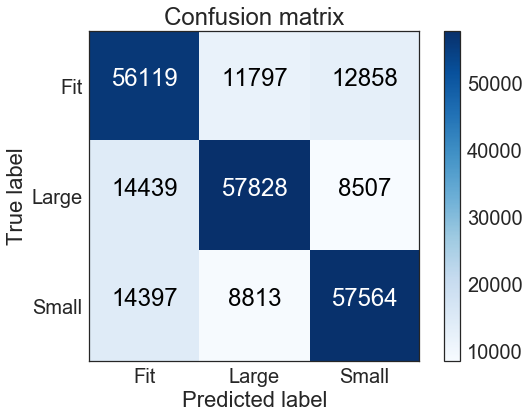

In [177]:
#model evaluation
y_pred = clf.predict(X_train)
cnf_matrix_tra = confusion_matrix(y_train, y_pred)

class_names = ['Fit','Large','Small']
plt.figure()
plot_confusion_matrix(cnf_matrix_tra , classes=class_names, title='Confusion matrix')
plt.savefig('confusion_matrix_2.png',bbox_inches = "tight")
plt.show()

In [191]:
target_names = ['fit','large','small']
print(classification_report(y_train, y_pred, target_names=target_names))

              precision    recall  f1-score   support

         fit       0.66      0.69      0.68     80774
       large       0.74      0.72      0.73     80774
       small       0.73      0.71      0.72     80774

    accuracy                           0.71    242322
   macro avg       0.71      0.71      0.71    242322
weighted avg       0.71      0.71      0.71    242322



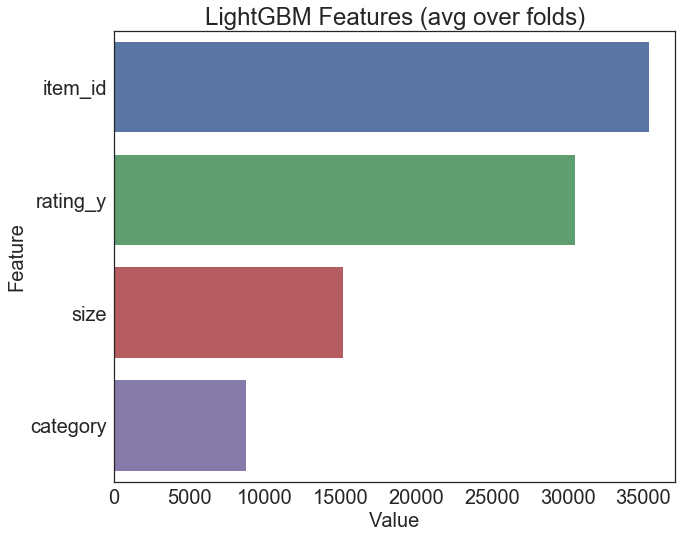

In [190]:
feature_imp = pd.DataFrame(sorted(zip(clf.feature_importances_,X.columns)), 
                               columns=['Value','Feature'])
plt.figure(figsize=(10, 8))
p3 = sns.barplot(x= "Value", y="Feature", data=feature_imp.sort_values(by="Value", ascending=False))

p3.set_xlabel('Value',fontsize=20)
p3.set_ylabel('Feature',fontsize = 20)
p3.set_yticklabels(p3.get_yticklabels(),fontsize=20)

plt.title('LightGBM Features (avg over folds)')
plt.tight_layout()
plt.savefig('lgbm_importances_2.png')
plt.show()